# Exercises from Anna Pillepiech

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import illustris_python as il
import numpy as np
import h5py

from scipy import stats

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['image.origin'] = True

## Exercise 1: plot the stellar mass - total halo mass relation of galaxies at z=0.

### Open file: Illustris-3 simulation, snapshot 135 (z = 0)
I had to choose one so I took the one given in the _[getting started guide](http://www.tng-project.org/data/docs/scripts/)_.

In [3]:
file = './Illustris-3/output/groups_135/groups_135.0.hdf5'
f = h5py.File(file,'r')

Useless function now but was usefull to know what to "call"

In [4]:
u_want_keys = False
if u_want_keys:
    print('Keys: \n', list(f.keys()), '\n\n')
    print('Halo keys: \n', list(f.get('Group')), '\n') # group = halo

### Output the halos datasets
Note to myself: 'Group' corresponds to halos  
<font color=red> I made my own script and did not those of the group as it was faster to do for a one time exercise. Thus it doesn't account for offsets for example. Do you want me to use the TNG functions ? </font>    

### Types of particles:
- PartType0 - GAS
- PartType1 - DM
- PartType2 - (unused)
- PartType3 - TRACERS
- PartType4 - STARS & WIND PARTICLES
- PartType5 - BLACK HOLES

In [5]:
units = 1e10 / 0.704       # Units are in 1e10 Msol/h
part_type = 4              # See PartType" in the previous box

tot_mass = f['Group']['GroupMass'][:] * units
type_mass = f['Group']['GroupMassType'][:,part_type] *  units

### Computation of the wanted stat with _nb_bins_ bins  [$M_\odot / h$])  
<font color=red> I am not sure if that is what you meant by bins but this seemed the more obvious interpretation of it. </font>

In [6]:
stat = 'median'
nb_bins = 100

# creating array evenly spaced in log space to bin the data.
bins = np.logspace(np.log10(min(minval for minval in tot_mass if minval > 0)),np.log10(tot_mass.max()),nb_bins)
# computing median of the data along the bins
bin_stat, _, _ = stats.binned_statistic(tot_mass, type_mass, statistic=stat, bins=bins)
# taking the middle of the bins to plot (can also do an histogram)
mid_bin = 10**((np.log10(bins[1:]) + np.log10(bins[:-1]))/2)

/home/max/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


### Plot the result

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


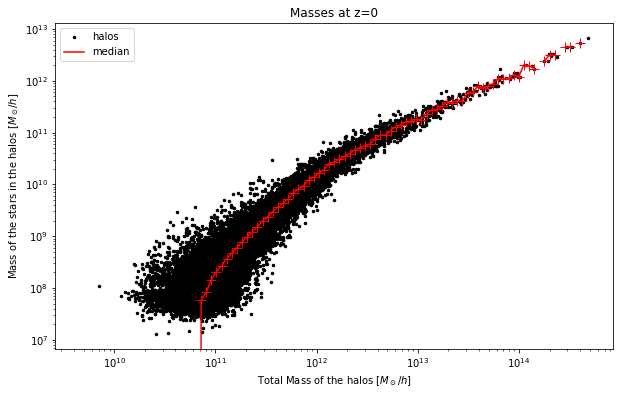

In [7]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)

ax1.plot(tot_mass, type_mass, '.', markersize=5, color='black', label='halos')
ax1.plot(mid_bin, bin_stat, '-', markersize=1, color='red', label=stat)     # If you want to see the line
ax1.plot(mid_bin, bin_stat, '+', markersize=10, color='red')                # If you want to see to points
ax1.set_xlabel('Total Mass of the halos [$M_\odot / h$]')
ax1.set_ylabel('Mass of the stars in the halos [$M_\odot / h$]')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(-10**2)
ax1.set_title('Masses at z=0')
ax1.legend()

### Exlusion of all the zero mass values for type_mass

In [8]:
for index, value in enumerate(type_mass):
    if value==0:
        tot_mass[index]=0
type_mass2 =[i for i in type_mass if i>0]
tot_mass2 =[i for i in tot_mass if i>0]

bin_stat2, bin_edges2, _ = stats.binned_statistic(tot_mass2, type_mass2, statistic=stat, bins=bins)
mid_bin2 = 10**((np.log10(bin_edges2[1:]) + np.log10(bin_edges2[:-1]))/2)

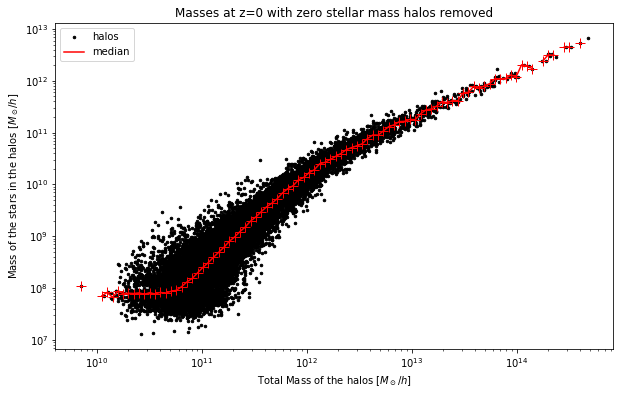

In [9]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)

ax1.plot(tot_mass2, type_mass2, '.', markersize=5, color='black', label='halos')
ax1.plot(mid_bin2, bin_stat2, '-', markersize=1, color='red', label=stat)            # If you want to see the line
ax1.plot(mid_bin2, bin_stat2, '+', markersize=10, color='red')                       # If you want to see to points
ax1.set_xlabel('Total Mass of the halos [$M_\odot / h$]')
ax1.set_ylabel('Mass of the stars in the halos [$M_\odot / h$]')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_title('Masses at z=0 with zero stellar mass halos removed')
ax1.legend()

## Exercise 2: visualize the stellar mass density in projection of a galaxy from one of the TNG runs.
### "Now, let's make a picture"

---
---
#### Little story
I am sorry this took such a long time, I missed the "TNG" part in the instruction and downloaded the data Illustris 3, 20Go...  
As I am in the counrtyside at my parents place right now, the downloading speed is 100ko/s. Si it supposedly took 2.31 days.  
However, that's not all, also, my PC crashed in the middle of the download. So I had to relaunch the download several time and delete some files that were stopped in the middle of the dl.
In conclusion it took from sunday morning to tuesday night (actually ~ 1am on wednesday).  

Afterwards, seeing the image I realised my mistake. I am sorry for the delay.  

---
I took a mid resolution of TNG-100 so that I could do the exercise on monday. Also, I cheated a bit and downloaded a subbox so that the download would be even faster. Thus, I had to change the name of the files from _snap_subbox1_4379.0.hdf5_ to _snap_4379.0.hdf5_ to use the function that does everything from the [Illustris-TNG](http://www.tng-project.org/data/docs/scripts/) website. 

---
---

### Changing the window size for a nicer result

In [86]:
plt.rcParams['figure.figsize'] = (13, 6)
plt.rcParams['image.origin'] = True

### Taking out the data

In [75]:
basePath = './TNG100-2-Subbox0'
data_stars = il.snapshot.loadSubset(basePath,4379,'stars',['Coordinates'])

### And plotting it

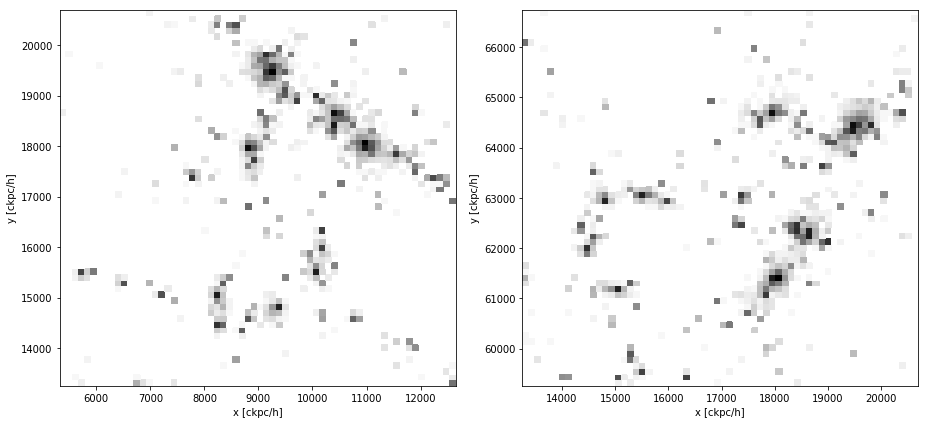

In [88]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

ax1.hist2d(data_stars[:,0], data_stars[:,1], norm=mcolors.LogNorm(), cmap='Greys', bins=64);
ax1.set_xlabel('x [ckpc/h]')
ax1.set_ylabel('y [ckpc/h]')

ax2.hist2d(data_stars[:,1], data_stars[:,2], norm=mcolors.LogNorm(), cmap='Greys', bins=64);
ax2.set_xlabel('x [ckpc/h]')
ax2.set_ylabel('y [ckpc/h]')

fig.tight_layout()

In [64]:
size_projection = np.shape(data_stars[:,0])[0]
proj_data_stars = np.zeros(size_projection)

In [69]:
bleh = il.snapshot.loadSubset(basePath,4379,'stars')

In [62]:
print(data_stars[:,1])

[17723.5996605  17860.11235962 17772.23984764 ... 19687.11074222
 19648.29207303 19779.60617563]


In [61]:
np.shape(data_stars)

(327087, 3)

In [68]:
file2 = './TNG100-2-Subbox0/snapdir_4379/snap_4379.0.hdf5'
f2 = h5py.File(file,'r')
u_want_keys = True
if u_want_keys:
    print('Keys: \n', list(f.keys()), '\n\n')
    print('Halo keys: \n', list(f.get('Group')), '\n') # group = halo
    print('Halo keys: \n', list(f.get('GroupBHMass')), '\n') # group = halo
    

Keys: 
 ['Group', 'Header', 'Offsets', 'Subhalo'] 


Halo keys: 
 ['GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'] 



TypeError: 'NoneType' object is not iterable

In [55]:
for i in range(size_projection):
    proj_data_stars[i]=sum(data_stars[2])

### Actually, dm looks better :)

Text(0, 0.5, 'y [ckpc/h]')

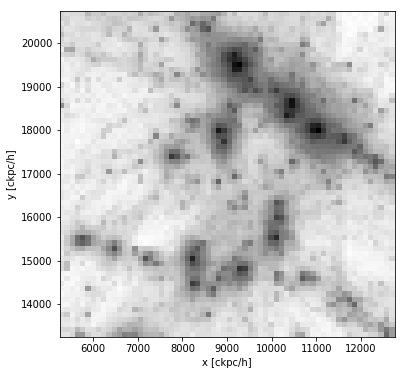

In [29]:
data_dm = il.snapshot.loadSubset(basePath,4379,'dm',['Coordinates'])

fig, ax = plt.subplots(nrows=1, ncols=1)

ax.hist2d(data_dm[:,0], data_dm[:,1], norm=mcolors.LogNorm(), cmap='Greys', bins=64);
ax.set_xlabel('x [ckpc/h]')
ax.set_ylabel('y [ckpc/h]')